In [20]:
import sys
import xarray as xr
import random
import numpy as np
import importlib as imp
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors

import utils
import databuilder.filemethods as filemethods
from databuilder.data_generator import ClimateData
import databuilder.data_generator as data_generator
import databuilder.filemethods as filemethods

print(f"python version = {sys.version}")
print(f"numpy version = {np.__version__}")
print(f"xarray version = {xr.__version__}")

python version = 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
numpy version = 1.26.4
xarray version = 2024.2.0


In [21]:
imp.reload(utils)

config = utils.get_config("exp000")
seed = config["seed_list"][0]

In [22]:
imp.reload(data_generator)

data = ClimateData(
    config["databuilder"], 
    expname = config["expname"],
    seed=seed,
    data_dir = config["data_dir"], 
    figure_dir=config["figure_dir"],
    fetch=True,
    verbose=False
)

f_dict is: 
 {'x': <xarray.DataArray 'PRECT' (time: 1095, lat: 180, lon: 360, channel: 1)> Size: 284MB
array([[[[8.72354189e-10],
         [8.74143369e-10],
         [8.75868822e-10],
         ...,
         [8.66614169e-10],
         [8.68588201e-10],
         [8.70502059e-10]],

        [[5.97882577e-10],
         [6.05624106e-10],
         [6.13347539e-10],
         ...,
         [5.74621351e-10],
         [5.82374038e-10],
         [5.90130222e-10]],

        [[5.43213641e-10],
         [5.59561231e-10],
         [5.76133141e-10],
         ...,
...
         ...,
         [1.09257647e-09],
         [1.07936060e-09],
         [1.06540354e-09]],

        [[8.42076464e-10],
         [8.42475423e-10],
         [8.42894587e-10],
         ...,
         [8.40884695e-10],
         [8.41292702e-10],
         [8.41686110e-10]],

        [[1.30652134e-09],
         [1.30919187e-09],
         [1.31178413e-09],
         ...,
         [1.29806310e-09],
         [1.30095412e-09],
         [1.303774

NotImplementedError: oops NONE error

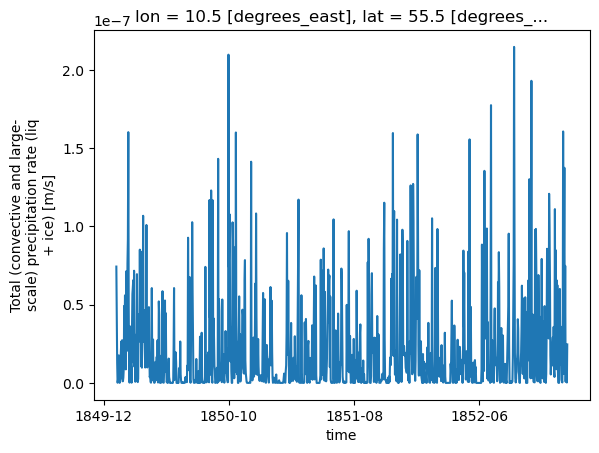

In [ ]:
dtrainx = data.d_train["x"]
dtrainx_specific = dtrainx.sel(lat = 55, lon = 10, method = "nearest")
dtrainx_specific.plot()

In [ ]:
# trainda = data._create_data()
# print(trainda)

config["databuilder"]["input_mask"][0]

'None'

In [ ]:
# import gzip, pickle

# data_savename = "/Users/eabarnes/big_data/e3sm_v2/presaved_data/exp001_train.pkl"
# with gzip.open(data_savename, "wb") as fp:
#     pickle.dump(x_train, fp)
#     pickle.dump(labels_train, fp)

#     pickle.dump(x_mean, fp)
#     pickle.dump(x_std, fp)
    
#     pickle.dump(lat, fp)
#     pickle.dump(lon, fp)

# data_savename = "/Users/eabarnes/big_data/e3sm_v2/presaved_data/exp001_val_test.pkl"
# with gzip.open(data_savename, "wb") as fp:
#     pickle.dump(x_val, fp)
#     pickle.dump(labels_val, fp)

#     pickle.dump(x_test, fp)
#     pickle.dump(labels_test, fp)
    
#     pickle.dump(lat, fp)
#     pickle.dump(lon, fp)

/System/Volumes/Data/Users/C830793391/miniconda3/pkgs/libtiff-4.5.1-h313beb8_0/lib/libtiff.5.dylib


/System/Volumes/Data/Users/C830793391/miniconda3/envs/jvp1/lib/libtiff.5.dylib

Users/C830793391/miniconda3/envs/env-torch/lib/libtiff.6.dylib


